In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.datasets import make_classification
from collections import Counter

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, log_loss
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from numpy.random import RandomState

import shap
shap.initjs()


In [2]:
# 실수형 데이터 모음
float_data = [
    'age','ainc','DI1_ag','DI2_ag','DI3_ag','DI5_ag','DI6_ag','DM2_ag','DM3_ag','DM4_ag','DJ2_ag','DJ4_ag',
    'DE2_ag','DE1_ag','DC1_ag','DC2_ag','DC3_ag','DC4_ag','DC5_ag','DC6_ag','DC7_ag','DC11_ag','DC12_ag','DF2_ag',
    'DL1_ag','DJ8_ag','DJ6_ag','DH4_ag','DH2_ag','DH3_ag','DH6_ag','DH7_ag','DN1_ag','DK8_ag','DK9_ag','DK4_ag',
    'DM8_ag','DF1_ya','DJ9_ya','LQ1_mn','LQ2_mn','EQ5D','AC3','AC3_1_01','AC3_1_02','AC3_1_03','AC3_1_04','AC3_1_05',
    'AC3_2_01','AC3_2_02','AC3_2_03','AC3_2_04','AC3_2_05','ij_expr','MH1_1','MO1_1','EC_wht_23','BD2','BD2_14','BA2_2_2',
    'BA2_2_4','BA2_2_6','sc_seatblt','sc_seatblt2','sc_seatblt3','BP16_1','BP16_2','BP16_11','BP16_12','BP16_13','BP16_14','BP16_21',
    'BP16_22','BP16_23','BP16_24','mh_PHQ_S','mh_GAD_S','mh_stress','BS2_1','BS2_2','BS3_2','BS3_3','BS6_2','BS6_2_1',
    'BS6_2_2','BS6_3','BS6_4','BS6_4_1','BS6_4_2','BS12_47_1','BS12_47_2','BS2','BS10_2','BS10_3','sm_presnt','BE3_72',
    'BE3_73','BE3_74','BE3_82','BE3_83','BE3_84','BE3_92','BE3_93','BE3_94','BE3_76','BE3_77','BE3_78','BE3_86',
    'BE3_87','BE3_88','BE8_1','BE8_2','BE3_32','BE3_33','pa_aerobic','LW_mp_a','LW_ms_a','LW_pr_1','LW_mt_a1','LW_mt_a2',
    'LW_br_ch','LW_br_dur','LW_br_yy','LW_br_mm','HE_fst','HE_dprg','HE_PLS_15','HE_PLS_30','HE_sbp1','HE_dbp1','HE_sbp2','HE_dbp2',
    'HE_sbp3','HE_dbp3','HE_sbp','HE_dbp','HE_ht','HE_wt','HE_wc','HE_nc','HE_BMI','HE_glu','HE_HbA1c','HE_insulin',
    'HE_chol','HE_HDL_st2','HE_TG','HE_LDL_drct','HE_ast','HE_alt','HE_HB','HE_HCT','HE_BUN','HE_crea','HE_WBC','HE_RBC',
    'HE_Bplt','HE_Uacid','HE_df','HE_dog','HE_cat','HE_birch','HE_oak','HE_Jhop','HE_ragweed','HE_Uph','HE_Usg','HE_Ucrea',
    'HE_Ualb','HE_Ukal','HE_Ucot','HE_fvc','HE_fvcp','HE_fev1','HE_fev1p','HE_fev1fvc','HE_fev6','HE_fef25_75','HE_pef','HE_cough2',
    'HE_sput2','HE_PFTag','O_DTD','O_DTP','O_DFTD','O_DMFTP','O_IMP_UI','O_IMP_UM','O_IMP_LI','O_IMP_LM','O_BR_N_U','O_BR_N_L',
    'GS_mea_r_1','GS_mea_r_2','GS_mea_r_3','GS_mea_l_1','GS_mea_l_2','GS_mea_l_3','T_HR500_RT','T_HR1000_RT','T_HR2000_RT','T_HR4000_RT','T_HR8000_RT','T_HR500_LT',
    'T_HR1000_LT','T_HR2000_LT','T_HR4000_LT','T_HR8000_LT','T_VHIT_GA_R','T_VHIT_GA_L','E_Dr_dsph','E_Dr_dcyl','E_Dr_a','E_Dl_dsph','E_Dl_dcyl','E_Dl_a',
    'E_Pr_1','E_Pl_1','IAQ_PM2_5','IAQ_CO2','IAQ_HCHO','IAQ_TVOC','IAQ_Benzene','IAQ_Toluene','IAQ_Ethylbenzene','IAQ_Xylene','IAQ_Styrene','IAQ_PM2_5_atmos',
    'IAQ_01_Y','IAQ_01_M','IAQ_06_1N','IAQ_06_2N','IAQ_06_3N','IAQ_08_1_1','IAQ_11_2_1','IAQ_11_3H','IAQ_11_3M','IAQ_13_1F','IAQ_13_2F','IAQ_13_3F',
    'IAQ_13_4F','IAQ_13_1H','IAQ_13_1M','IAQ_13_2H','IAQ_13_2M','IAQ_13_3H','IAQ_13_3M','IAQ_13_4H','IAQ_13_4M','IAQ_22_1','IAQ_22_3','IAQ_23_2',
    'VOC_WKD_H','VOC_Ucrea','VOC_BMA','VOC_BMA_cr','VOC_2MHA','VOC_2MHA_cr','VOC_34MHA','VOC_34MHA_cr','VOC_PGA','VOC_PGA_cr','VOC_MA','VOC_MA_cr',
    'VOC_SPMA','VOC_SPMA_cr','VOC_3HPMA','VOC_3HPMA_cr','VOC_BPMA','VOC_BPMA_cr','VOC_DHBMA','VOC_DHBMA_cr','Y_MTM_S1','Y_MTM_S2','Y_MTM_D1','Y_MTM_D2',
    'Y_FM_S1','Y_FM_S2','Y_FM_D1','Y_FM_D2','Y_MLK_ST','Y_WN_ST','N_MEAL_T','NF_EN','NF_WATER','NF_PROT','NF_FAT','NF_SFA',
    'NF_MUFA','NF_PUFA','NF_N3','NF_N6','NF_10_0','NF_12_0','NF_14_0','NF_16_0','NF_18_0','NF_20_0','NF_22_0','NF_24_0',
    'NF_14_1','NF_16_1','NF_18_1','NF_20_1','NF_22_1','NF_24_1','NF_18_2N6','NF_18_3N3','NF_18_3N6','NF_18_4','NF_20_2','NF_20_3N6',
    'NF_20_4N6','NF_20_5N3','NF_22_2','NF_22_5','NF_22_6N3','NF_CHOL','NF_CHO','NF_TDF','NF_SUGAR','NF_CA','NF_PHOS','NF_NA',
    'NF_K','NF_MG','NF_FE','NF_ZN','NF_VA_RAE','NF_VITD','NF_VITE','NF_CAROT','NF_RETIN','NF_B1','NF_B2','NF_NIAC',
    'NF_FOLATE','NF_VITC','N_WAT_C','N_INTK','N_EN','N_WATER','N_PROT','N_FAT','N_SFA','N_MUFA','N_PUFA','N_N3',
    'N_N6','N_CHOL','N_CHO','N_TDF','N_SUGAR','N_CA','N_PHOS','N_NA','N_K','N_MG','N_FE','N_ZN',
    'N_VA_RAE','N_VITD','N_VITE','N_CAROT','N_RETIN','N_B1','N_B2','N_NIAC','N_FOLATE','N_VITC','LS_FQ','LS_CA',
    'LS_PHOS','LS_FE','LS_VA','LS_B1','LS_B2','LS_NIAC','LS_VITC','TLS_CA','TLS_PHOS','TLS_FE','TLS_VA','TLS_B1',
    'TLS_B2','TLS_NIAC','TLS_VITC'
]


In [3]:
file_path = '../data/hn_prepared.csv'
df = pd.read_csv(file_path, encoding='UTF-8', low_memory=False)

df.drop(['cervical_cancer'], axis=1, inplace=True)

df.shape

(18511, 174)

In [4]:
all_columns = df.columns
# 실수형 열을 제외한 나머지 열을 범주형 열로 추출
categorical_data = [col for col in all_columns if col not in float_data  and col != 'diabetes']
current_float_data = [col for col in all_columns if col in float_data]

print(len(categorical_data))
print(len(current_float_data))
print(len(current_float_data) + len(categorical_data))

119
54
173


In [5]:
# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 선택한 열에 대해 정규화 적합 및 변환
for col in float_data:
    try:
        df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1)).flatten()
    except KeyError:
        pass

In [6]:
df.head()

,region,town_t,apt_t,sex,age,cfam,genertn,allownc,house,live_t,...,bloodpressure,hc_drug,hyper_chol,genetic_hbp,genetic_hl,genetic_heart,genetic_cva,genetic_diabetes,genetic_thy,genetic_hepa_b
0,1,1,1,1,0.683333,3,4,2,1,3,...,1,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0.133333,3,4,2,1,3,...,0,0,0,2,0,0,0,0,0,0
2,1,1,1,1,0.550000,3,4,2,2,3,...,1,0,0,0,0,0,0,0,0,0
3,1,1,1,2,0.500000,3,4,2,2,3,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,2,0.850000,1,1,2,2,3,...,1,0,0,0,0,0,0,0,0,0


In [7]:
y = df.diabetes
X = df.drop('diabetes', axis=1)

In [8]:
# # 히트맵 그리기
# plt.figure(figsize=(200, 200))
# mask = np.triu(np.ones_like(X.corr(), dtype=bool))  # 대각선 아래 부분에만 True가 되도록 마스크 생성
# sns.heatmap(X.corr(), annot=True, mask=mask, fmt=".2f")  # annot=True로 하여 숫자 표시, fmt=".2f"로 소수점 두 자리까지 표시
# plt.savefig('../resources/heatmap.png')
# plt.show()

In [9]:
missing_values = X.isnull().sum()
missing_columns = missing_values[missing_values > 0].index.tolist()
print("Columns with missing values:")
print(missing_columns)

Columns with missing values:
[]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


In [11]:
# # SelectKBest 객체 생성
# selector = SelectKBest(score_func=chi2, k=40)

# # 특성 선택 및 변환
# X_train_selected = selector.fit_transform(X_train, y_train)

# # 선택된 특성의 인덱스 확인
# selected_features_idx = selector.get_support(indices=True)
# print("Selected features indices:", selected_features_idx)

# # 선택된 특성의 이름 확인
# selected_features_names = X_train.columns[selected_features_idx]
# print("Selected features names:", selected_features_names)

# X_train = X_train[selected_features_names]
# X_test = X_test[selected_features_names]

In [11]:
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

print(f'Original dataset shape {X.shape}')
print(f'Original dataset samples per class {Counter(y)}')

# simulate the 2 last columns to be categorical features
X[:, -2:] = RandomState(10).randint(0, 4, size=(1000, 2))
sm = SMOTENC(random_state=42, categorical_features=[18, 19])
X_res, y_res = sm.fit_resample(X, y)

print(f'Resampled dataset samples per class {Counter(y_res)}')

Original dataset shape (1000, 20)
Original dataset samples per class Counter({1: 900, 0: 100})
Resampled dataset samples per class Counter({0: 900, 1: 900})


In [12]:
# SMOTE-NC를 적용할 훈련 데이터에 대한 범주형 열의 인덱스 생성
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_data]


# SMOTE-NC 적용
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=0)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

# 결과 확인
print("Original training data shape:", X_train.shape, y_train.shape)
print("Resampled training data shape:", X_train_resampled.shape, y_train_resampled.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Original training data shape: (14808, 173) (14808,)
Resampled training data shape: (23042, 173) (23042,)
Test data shape: (3703, 173) (3703,)


In [13]:
X_train = X_train_resampled
y_train = y_train_resampled
# XGBModel = XGBClassifier(tree_method='gpu_hist', gpu_id=0, enable_categorical=True)
XGBModel = XGBClassifier(device='cuda', colsample_bytree = 0.8, gamma = 0, learning_rate = 0.1, max_depth = 7, n_estimators= 300, enable_categorical=True)
XGBModel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device='cuda', early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
# #XGBoost 정의
# xgb= XGBClassifier(device='cuda')

# xgb_param_grid={
#     'n_estimators': [100,200,300],
#     'learning_rate': [0.01,0.05,0.1],
#     'max_depth': [3,5,7],
#     'gamma': [0,1,2],
#     'colsample_bytree': [0.8,0.9]
# }

# #score종류는 acc,f1,f1_micro,f1_macro등 원하는걸로 설정)
# #여기서 설정 파라미터의 갯수(총 4000개의 조합이므로 4000번의 학습이 돌아감)
# xgb_grid=GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="f1_macro", n_jobs=-1, verbose = 2)
# xgb_grid.fit(X_train, y_train)

# #best f1_macro 수치와 best parameter확인
# print("best f1_macro : {0: .4f}".format(xgb_grid.best_score_))
# print("best param : ",xgb_grid.best_params_)

# #dataframe으로 랭킹순보기
# result_df = pd.DataFrame(xgb_grid.cv_results_)
# result_df.sort_values(by=['rank_test_score'],inplace=True)

# #plot
# result_df[['params','mean_test_score','rank_test_score']].head(10)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
best f1_macro :  0.9056
best param :  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


,params,mean_test_score,rank_test_score
26,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.905574,1
107,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.904438,2
104,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.903062,3
106,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.902488,4
25,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.901869,5
50,"{'colsample_bytree': 0.8, 'gamma': 1, 'learnin...",0.901613,6
134,"{'colsample_bytree': 0.9, 'gamma': 1, 'learnin...",0.901394,7
133,"{'colsample_bytree': 0.9, 'gamma': 1, 'learnin...",0.901394,7
52,"{'colsample_bytree': 0.8, 'gamma': 1, 'learnin...",0.901368,9
53,"{'colsample_bytree': 0.8, 'gamma': 1, 'learnin...",0.901368,9


In [31]:
XGBModel.score(X_test, y_test)

0.8679449095328112

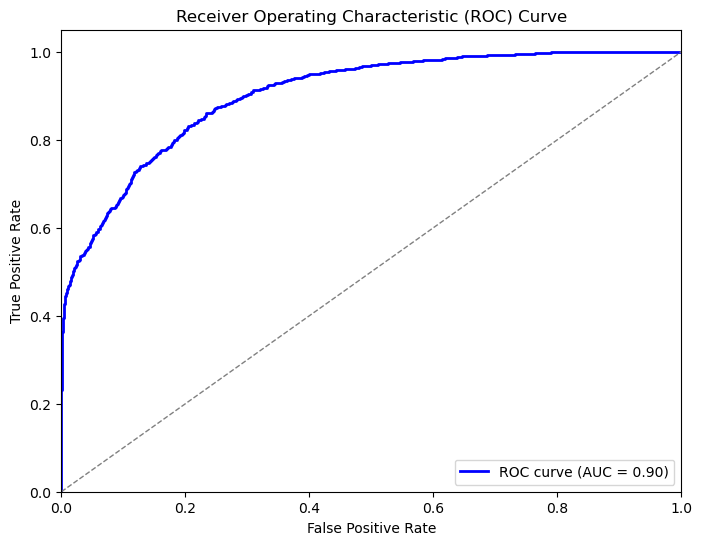

In [32]:
# Calculate ROC curve
y_prob = XGBModel.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [18]:
confusion_matrix(y_test, XGBModel.predict(X_test))

array([[2745,  174],
       [ 315,  469]], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# 모델 예측
y_pred = XGBModel.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# 정밀도 계산
precision = precision_score(y_test, y_pred)
print("정밀도:", precision)

# 재현율 계산
recall = recall_score(y_test, y_pred)
print("재현율:", recall)

# F1 점수 계산
f1 = f1_score(y_test, y_pred)
print("F1 점수:", f1)

# AUC 계산
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("혼동 행렬:")
print(conf_matrix)

정확도: 0.8679449095328112
정밀도: 0.7293934681181959
재현율: 0.5982142857142857
F1 점수: 0.657323055360897
AUC: 0.7693024152106885
혼동 행렬:
[[2745  174]
 [ 315  469]]


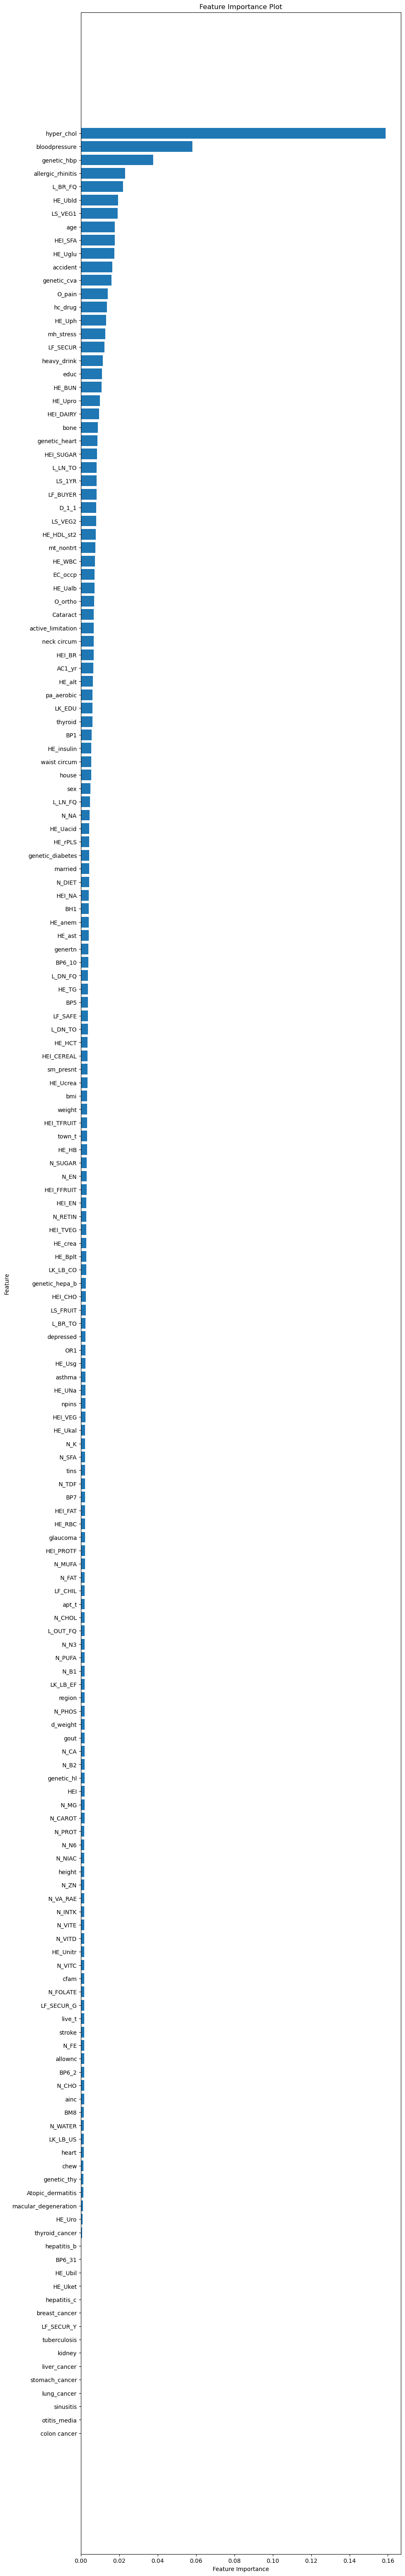

In [20]:
# Assuming you have a model that provides feature importances (e.g., XGBoost)
importances = XGBModel.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(10, 80))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

In [21]:
shap_values = shap.TreeExplainer(XGBModel).shap_values(X_test)
shap_interaction_values = shap.TreeExplainer(XGBModel).shap_interaction_values(
    X_test
)

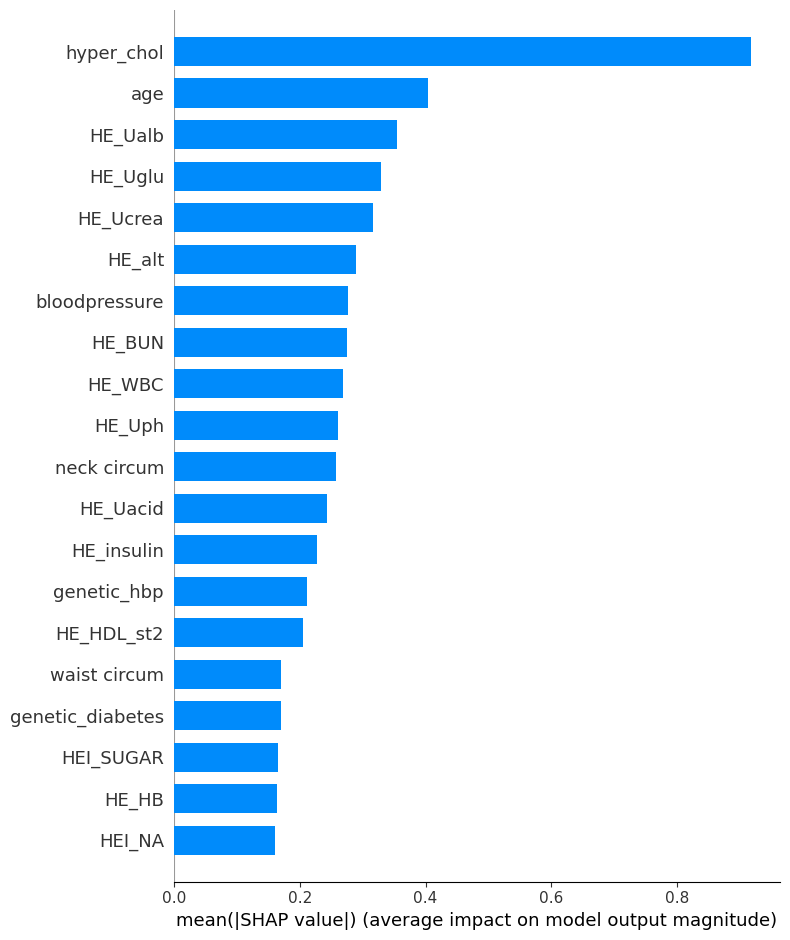

In [22]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

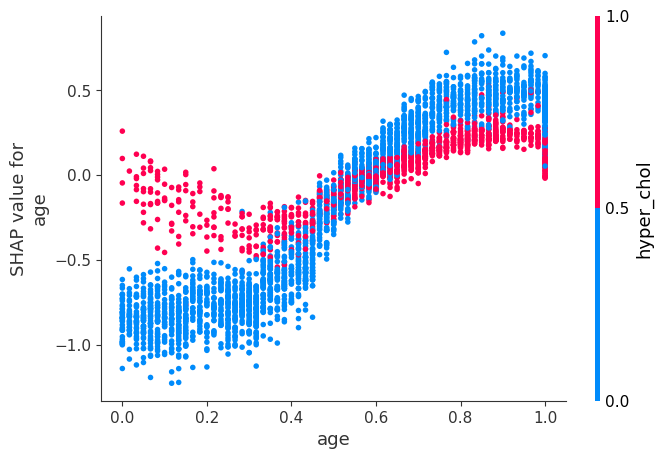

In [23]:
shap.dependence_plot('age', shap_values, X_test)

In [24]:
shap.force_plot(shap.TreeExplainer(XGBModel).expected_value, shap_values[0,:], X_test.iloc[0,:])

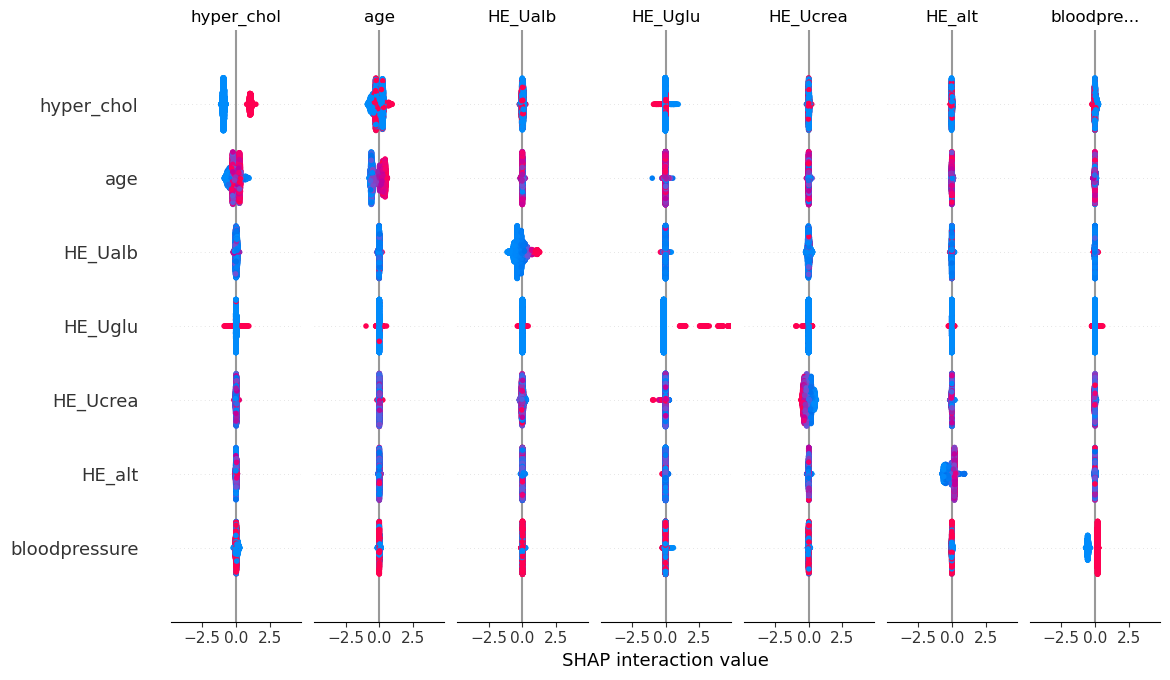

In [25]:
shap.summary_plot(shap_interaction_values, X_test)

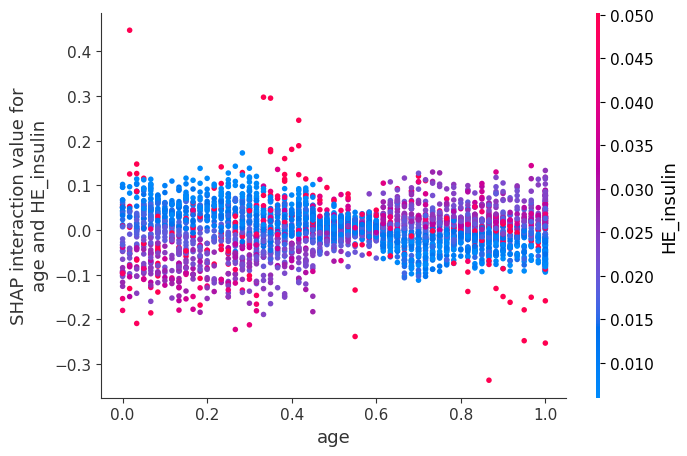

In [26]:
shap.dependence_plot(('age', 'HE_insulin'), shap_interaction_values, X_test)

In [27]:
# SHAP 값을 계산합니다.
explainer = shap.Explainer(XGBModel, X_train)
shap_values = explainer(X_test)

def waterfall_plot_idx(i):
    # 특정 예측에 대한 waterfall plot을 그립니다.
    index = i  # 원하는 예측의 인덱스를 선택합니다.
    shap.waterfall_plot(shap_values[index], max_display=20, show=False)
    plt.show()

100%|===================| 3685/3703 [01:00<00:00]        

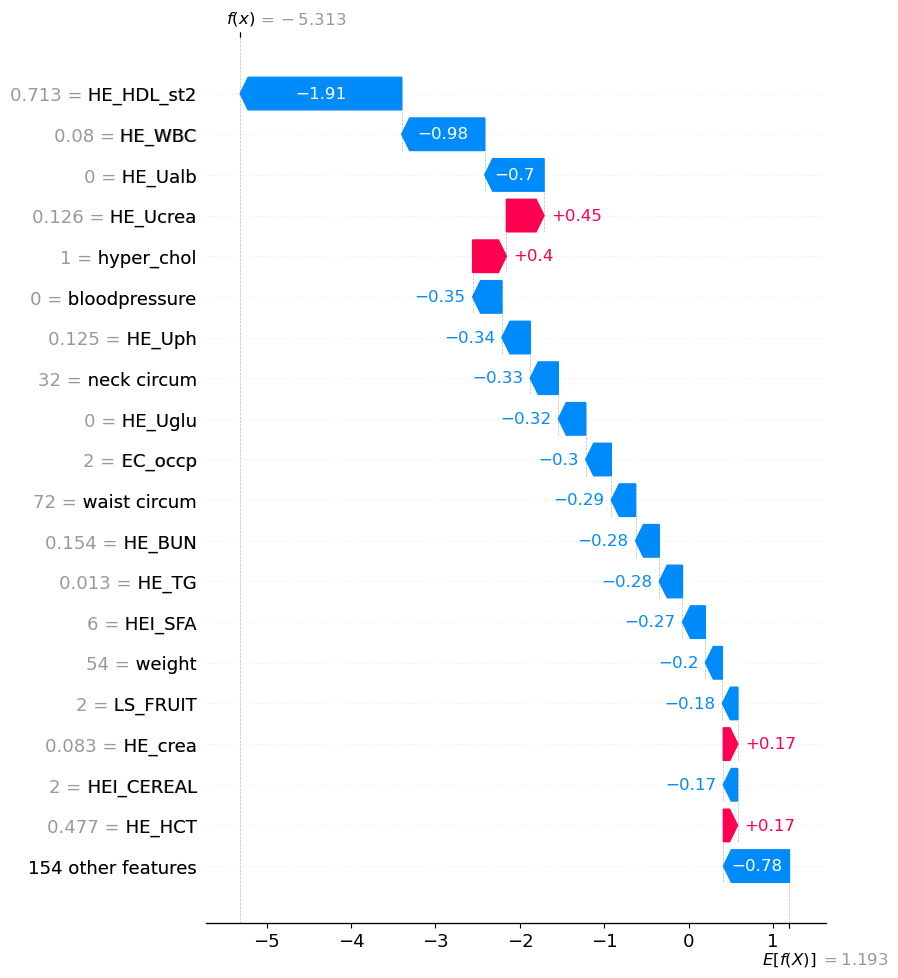

In [28]:
waterfall_plot_idx(1)

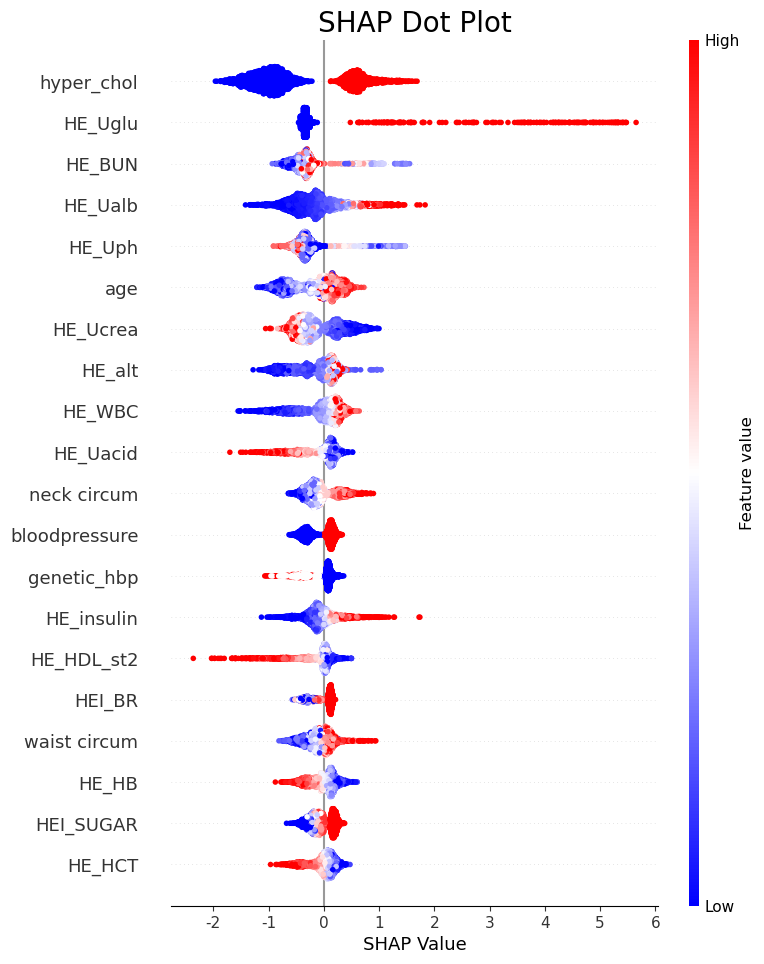

In [30]:
## Dot Plot
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
shap.summary_plot(shap_values, X_test, 
                  cmap='bwr', ## 컬러맵
                  show=False, ## 기존 X축 라벨 표시 안함
                 )
ax.set_xlabel('SHAP Value')
ax.set_title('SHAP Dot Plot', fontsize=20)
plt.show()